#### 图像识别第二章

读取图像

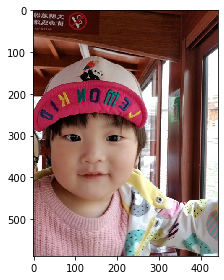

In [1]:
# 使用skimage打开并显示图片
from skimage import data,io
# 创建skimage图像流
img = io.imread('../imgs/111.jpg')
# 显示图像
io.imshow(img)
io.show()

灰度化

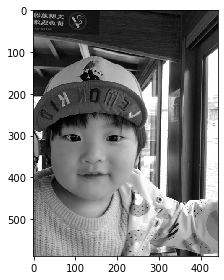

In [2]:
img = io.imread('../imgs/111.jpg',as_gray=True)
# 显示图像
io.imshow(img)
io.show()

加载内置图像

In [3]:
# 导入skimage下的data和io模块
from skimage import data,io
# 导入data_dir
from skimage import data_dir
# 从data中读取内置的图像
img = data.hubble_deep_field() # 这是一张星空的图像
print(data_dir)

f:\Anaconda\lib\site-packages\skimage\data


显示类型

In [4]:
from skimage import data,io
import json
img = data.hubble_deep_field()
# 创建返回值JSON
result = {
    '图像类型':str(type(img)),
    '图像大小（Numpy矩阵）':img.shape,
    '图像宽度':img.size,
    '长':int(img.shape[0]),
    '宽':int(img.shape[1]),
    'RGB通道数':int(img.shape[2]),
    '最大像素':int(img.max()),
    '最小像素':int(img.min()),
    '平均像素':int(img.mean()),
}
print(json.dumps(result,indent=4,ensure_ascii=False,sort_keys=True))



{
    "RGB通道数": 3,
    "图像大小（Numpy矩阵）": [
        872,
        1000,
        3
    ],
    "图像宽度": 2616000,
    "图像类型": "<class 'numpy.ndarray'>",
    "宽": 1000,
    "平均像素": 19,
    "最大像素": 255,
    "最小像素": 0,
    "长": 872
}


保存图像

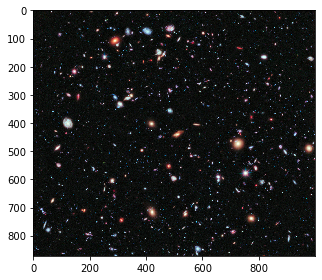

In [5]:
# 导入skimage下的data和io模块
from skimage import data,io
# 导入data_dir
from skimage import data_dir
# 从data中读取内置的图像
img = data.hubble_deep_field() # 这是一张星空的图像
io.imshow(img) # 显示图像
io.show()
# 保存图像
# 注意这里的img类型必须是numpy.ndarray
io.imsave('../imgs/hubble_deep_field.jpg',img) # 保存图像

红色通道效果显示

153


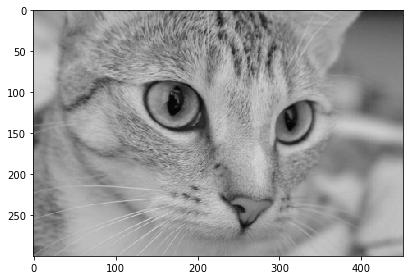

In [7]:
from skimage import data,io
img = data.chelsea()
# 输出图片的R同道中人的第20行30列的像素值
print(img[20,30,0])
# 显示猫图片的红色通道的图片
R = img[:,:,0]
io.imshow(R)
io.show()

二值化操作

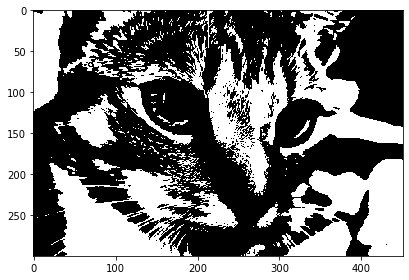

In [8]:
from skimage import data,io,color
img = data.chelsea()
# 将图像转换为灰度图像
gray = color.rgb2gray(img)
# 提取行列
rows,cols = gray.shape
# 创建二值化图像，因为图像是灰度图像，因此我们只需要判断其灰度值即可
for i in range(rows):
    for j in range(cols):
        # 当灰度值大于0.5时，将其设置为1，否则为0
        if gray[i,j] > 0.5:
            gray[i,j] = 1
        else:
            gray[i,j] = 0
# 显示图像
io.imshow(gray)
io.show()

对内置猫图片进行裁剪处理

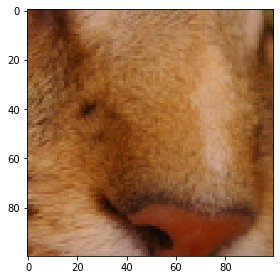

In [9]:
from skimage import data,io
img = data.chelsea()
# 裁切
slicedImage = img[150:250,200:300,:]
io.imshow(slicedImage)

将RGB图像转换为灰度图像

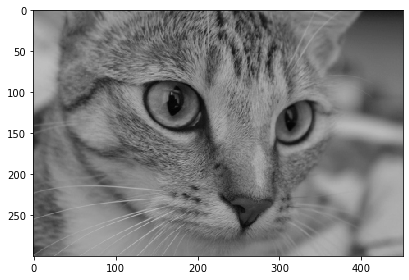

In [10]:
from skimage import io,data,color
img = data.chelsea()
# 使用color.rgb2gray将图像转换为灰度图像
image_Gray = color.rgb2gray(img)
io.imshow(image_Gray)

使用subplot()函数绘制多视图窗口

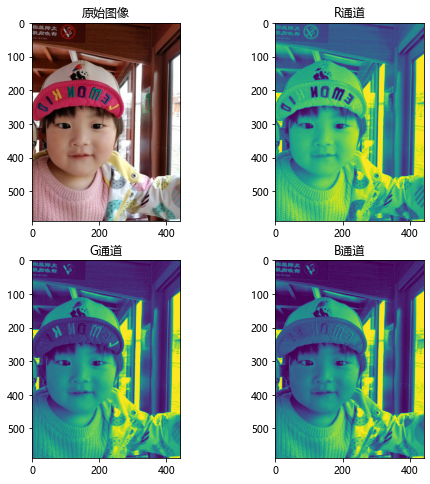

In [11]:
from skimage import data,io
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
image = io.imread('../imgs/111.jpg')
plt.figure(num='cat',figsize=(8,8)) # 创建一个名为cat的窗口，并设置大小
plt.subplot(2,2,1) # 在窗口中创建一个2行2列的图像，第一个图像
plt.title('原始图像')
plt.imshow(image)
plt.subplot(2,2,2) # 在窗口中创建一个2行2列的图像，第二个图像
plt.title('R通道')
plt.imshow(image[:,:,0])
plt.subplot(2,2,3) # 在窗口中创建一个2行2列的图像，第三个图像
plt.title('G通道')
plt.imshow(image[:,:,1])
plt.subplot(2,2,4) # 在窗口中创建一个2行2列的图像，第四个图像
plt.title('B通道')
plt.imshow(image[:,:,2])
plt.show()

HSV通道分图绘制

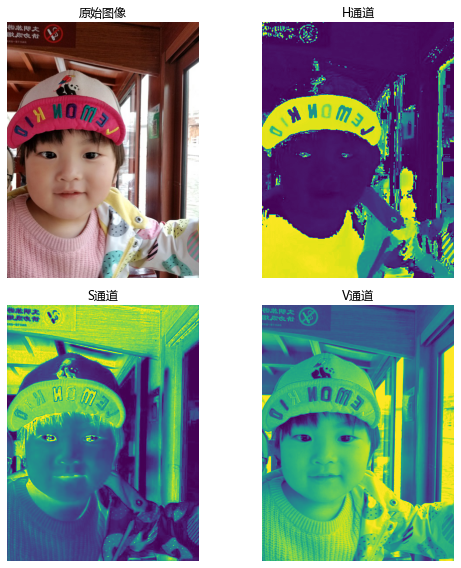

In [12]:
from skimage import data,io
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
image = io.imread('../imgs/111.jpg')
image_HSV = color.rgb2hsv(image)
# 创建subplots分割窗口
fig,axes = plt.subplots(2,2,figsize=(8,8))
axe0,axe1,axe2,axe3 = axes.ravel()
axe0.imshow(image)
axe0.set_title('原始图像')
axe1.imshow(image_HSV[:,:,0])
axe1.set_title('H通道')
axe2.imshow(image_HSV[:,:,1])
axe2.set_title('S通道')
axe3.imshow(image_HSV[:,:,2])
axe3.set_title('V通道')
for ax in axes.ravel():
    ax.axis('off')
fig.tight_layout()
plt.show()

#### RGB通道和HSV通道的区别
RGB色彩模式是工业界的一种颜色标准，是通过对红(R)、绿(G)、蓝(B)三个颜色通道的变化以及它们相互之间的叠加来得到各式各样的颜色的，RGB即是代表红、绿、蓝三个通道的颜色，这个标准几乎包括了人类视力所能感知的所有颜色，是目前运用最广的颜色系统之一。

HSV是根据颜色的直观特性由A. R. Smith在1978年创建的一种颜色空间, 也称六角锥体模型。这个模型中颜色的参数分别是：色调（H），饱和度（S），明度（V）。由于HSV是一种比较直观的颜色模型，所以在许多图像编辑工具中应用比较广泛。

改变指定图片的大小

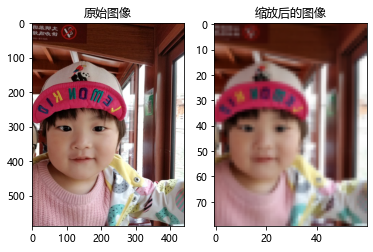

In [13]:
from skimage import transform,data,io
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
image = io.imread('../imgs/111.jpg')
# 创建一个新的Matplotlib对象存储改变后的图像
dst = transform.resize(image,(80,60))
plt.figure('resize')
# 创建一个一行两列的
plt.subplot(121)
plt.title('原始图像')
plt.imshow(image,plt.cm.gray)
plt.subplot(122)
plt.title('缩放后的图像')
plt.imshow(dst,plt.cm.gray)
plt.show()

使用函数rescale()缩放图片

In [18]:
from skimage import transform,data,io # 导入变换，数据和I/O操作模块
img = io.imread('../imgs/111.jpg') # 读取文件
print(img.shape) # 显示原始图像大小
## 仅能实现缩放整数倍
#print(transform.rescale(img,0.1).shape) # 将原始图像缩小0.1倍
#print(transform.rescale(img,[0.5,0.25]).shape) # 缩小图片的X为原始的一半，Y为原始的四分之一
print(transform.rescale(img,2).shape) # 将图片放大为原始的4倍

(588, 441, 3)
(1176, 882, 6)


使用函数rotate()函数旋转图片

(588, 441, 3)
(588, 441, 3)
(729, 676, 3)


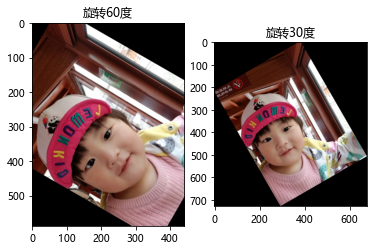

In [20]:
from skimage import transform,io
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
mpl.rcParams['axes.unicode_minus'] = False
img = io.imread('../imgs/111.jpg')
print(img.shape)
img1 = transform.rotate(img,60) # 将图片旋转60度大小不变
print(img1.shape)
img2 = transform.rotate(img,30,resize=True)
print(img2.shape)
plt.figure('缩放')
plt.subplot(121)
plt.title('旋转60度')
plt.imshow(img1,plt.cm.gray)
plt.subplot(122)
plt.title('旋转30度')
plt.imshow(img2,plt.cm.gray)
plt.show()